In [138]:
from pathlib import Path
import pandas as pd

from tqdm import tqdm as tqdm

# Validation with experimental results

In [148]:
NACA = '0012'
NUM_POINTS_X = 26

ITERATIONS_MAX     = 1e4
ITERATIONS_RESTART = ITERATIONS_MAX

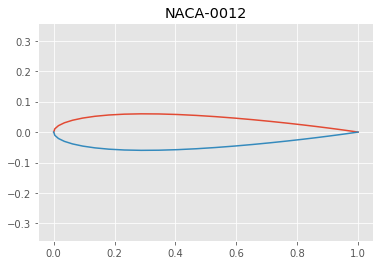

In [149]:
%run 1-Geometry.ipynb
%run 2-Solver.ipynb

---

## Computing the vortices

Compute the RHS, which depends on the incidence angle and the geometry. 

In [150]:
path_data = Path('../data/naca0012')

path_cl = path_data / 'cl.csv'

In [151]:
data_df = pd.read_csv(path_cl, 
                      sep = "\s+|\t+|\s+\t+|\t+\s+", 
                      engine = 'python', index_col='alpha')

data_df['Panel Method'] = np.nan

In [152]:
for alpha in tqdm(data_df.index):
    
    _, _ , cl = solve(alpha)
    
    data_df.loc[alpha, 'Panel Method'] = cl

100%|██████████| 28/28 [00:05<00:00,  4.70it/s]


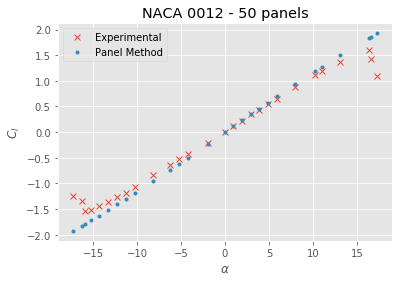

In [153]:
ax = data_df[['Experimental']].plot(marker = 'x', linewidth = 0.0)
data_df[['Panel Method']].     plot(marker = '.', linewidth = 0.0, ax = ax)

ax.set(title  = f'NACA 0012 - {N_b-1} panels', 
       ylabel = '$C_l$', 
       xlabel = '$\\alpha$');

plt.savefig(path_data / 'panels' / f'cl_comparison_{N_b-1}_panels.png', 
            transparent = True, 
            bbox_inches = 'tight', dpi = 300)

In [154]:
data_df[['Experimental', 'Panel Method']].to_csv(path_data / 'panels' / f'cl_comparison_{N_b-1}_panels.csv')

In [155]:
data_df['Relative Error'] = (data_df['Experimental'] - data_df['Panel Method']).div(data_df['Experimental']).abs()
data_df['Absolute Error'] = (data_df['Experimental'] - data_df['Panel Method']).abs()

In [156]:
data_df['Relative Error'].drop(index = 0.0).mul(100).describe().to_csv(path_data / 'panels' / f'cl_error_rel_{N_b-1}.csv')
data_df['Absolute Error'].drop(index = 0.0).mul(100).describe().to_csv(path_data / 'panels' / f'cl_error_abs_{N_b-1}.csv')